In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [143]:
def get_feature_type(family):
    f = family.lower()
    if f.startswith("tfidf"):
        return "tfidf"
    elif f.startswith("fasttext"):
        return "fasttext"
    elif f.startswith("wfe"):
        return "wfe"
    elif f.startswith("wefe"):
        return "wefe"
    elif f.startswith("fe"):
        return "fe"
    elif f.startswith("we"):
        return "we"
    else:
        return "other"  # just in case

FEATURES = ["tfidf", "fasttext", "we", "wfe", "wefe", "fe"]

# CLASSIFICATION PLOTS

## JETSON

In [144]:
clst_data = pd.read_csv("./generated/jetson/sentiment/single/all_lang.csv")

In [145]:
clst_data['FeatureType'] = clst_data['FeatureFamily'].apply(get_feature_type)

In [146]:
clst_data['EDP'] = clst_data['time_per_sample'] * clst_data['energy_per_sample']

In [147]:
clst_data['FeatureType'].value_counts()

FeatureType
we          2400
wefe        2400
wfe          960
fe           960
tfidf        400
fasttext     400
Name: count, dtype: int64

In [148]:
clst_data.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,2,LightGBM,0.970418,0.969958,0.797775,0.784675,76.615895,NaN,NaN,600,67.364187,0.000131,8.906810,0.112274,2.179795e-07,tfidf,2.447336e-08
1,tfidf,300,arabic,2,LogisticRegression,0.747469,0.761098,0.735533,0.749947,39.074461,NaN,NaN,600,67.608655,0.000131,8.874603,0.112681,2.186046e-07,tfidf,2.463261e-08
2,tfidf,300,arabic,2,RandomForest,0.788217,0.796738,0.747407,0.757930,3.278902,NaN,NaN,600,68.837639,0.000133,8.716162,0.114729,2.220724e-07,tfidf,2.547823e-08
3,tfidf,300,arabic,2,XGBoost,0.806050,0.815729,0.738033,0.751095,1.575219,NaN,NaN,600,67.744578,0.000131,8.856797,0.112908,2.190165e-07,tfidf,2.472864e-08
4,tfidf,300,arabic,2,GaussianNB,0.650765,0.672348,0.635421,0.657766,0.617560,NaN,NaN,600,67.553189,0.000131,8.881890,0.112589,2.179578e-07,tfidf,2.453957e-08


In [149]:
clst_data.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'N_class', 'Model',
       'AccuracyTrain', 'WeightedF1Train', 'AccuracyTest', 'WeightedF1Test',
       'TrainingTime', 'NumParams', 'NumEpochs', 'data_pts', 'time_sec',
       'energy_kwh', 'throughput', 'time_per_sample', 'energy_per_sample',
       'FeatureType', 'EDP'],
      dtype='object')

### ANALYSIS

In [150]:
tmp_data = clst_data[(clst_data.FeatureType == 'wefe') & (clst_data.N_class == 3)]

In [151]:
tmp_data.groupby('FeatureFamily')['WeightedF1Test'].median().sort_values()

FeatureFamily
WEFE-XGLM-T      0.646557
WEFE-mBERT-T     0.664576
WEFE-XLM-R-T     0.670682
WEFE-mE5-S       0.698093
WEFE-MPNet-S     0.706019
WEFE-BGE-M3-S    0.708238
Name: WeightedF1Test, dtype: float64

### BINARY CLASSIFICATION

In [152]:
binary_data = clst_data[clst_data.N_class == 2]
binary_data = binary_data.reset_index(drop=True)
binary_data.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,2,LightGBM,0.970418,0.969958,0.797775,0.784675,76.615895,NaN,NaN,600,67.364187,0.000131,8.906810,0.112274,2.179795e-07,tfidf,2.447336e-08
1,tfidf,300,arabic,2,LogisticRegression,0.747469,0.761098,0.735533,0.749947,39.074461,NaN,NaN,600,67.608655,0.000131,8.874603,0.112681,2.186046e-07,tfidf,2.463261e-08
2,tfidf,300,arabic,2,RandomForest,0.788217,0.796738,0.747407,0.757930,3.278902,NaN,NaN,600,68.837639,0.000133,8.716162,0.114729,2.220724e-07,tfidf,2.547823e-08
3,tfidf,300,arabic,2,XGBoost,0.806050,0.815729,0.738033,0.751095,1.575219,NaN,NaN,600,67.744578,0.000131,8.856797,0.112908,2.190165e-07,tfidf,2.472864e-08
4,tfidf,300,arabic,2,GaussianNB,0.650765,0.672348,0.635421,0.657766,0.617560,NaN,NaN,600,67.553189,0.000131,8.881890,0.112589,2.179578e-07,tfidf,2.453957e-08


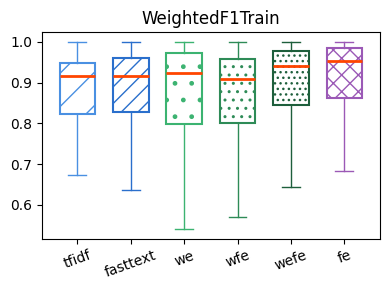

In [153]:
PLOT_TARGET = "WeightedF1Train"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


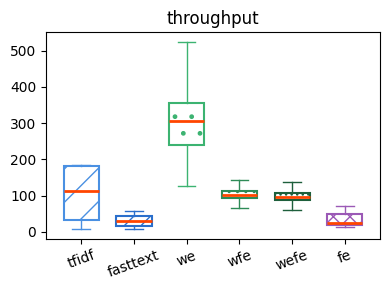

In [154]:
PLOT_TARGET = "throughput"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


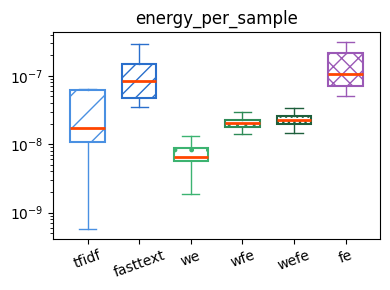

In [155]:
PLOT_TARGET = "energy_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


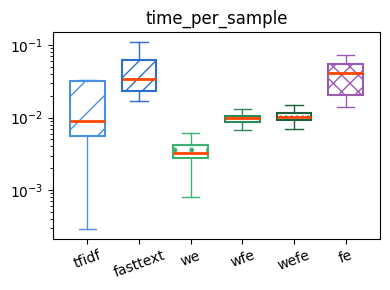

In [156]:
PLOT_TARGET = "time_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


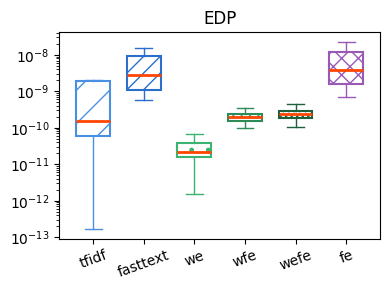

In [157]:
PLOT_TARGET = "EDP"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


##### WFE ABLATION -- FOR SELECTING mmm over mean

In [158]:
tmp_data = binary_data[binary_data.FeatureType == 'wfe']

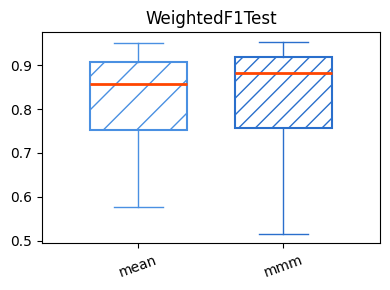

In [159]:
agg_type = ["mean", "mmm"]
PLOT_TARGET = "WeightedF1Test"

PLOT_DATA = defaultdict(list)
for agg in agg_type:
    PLOT_DATA[agg].append(tmp_data[tmp_data["FeatureVariant"]==agg][PLOT_TARGET])
    
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
# ax.set_yscale('log')

plt.tight_layout()
plt.show()


### Ternary CLASSIFICATION

In [160]:
ternary_data = clst_data[clst_data.N_class == 3]
ternary_data = ternary_data.reset_index(drop=True)
ternary_data.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,3,LightGBM,0.927154,0.927941,0.593883,0.595852,68.280387,NaN,NaN,600,69.228920,0.000135,8.666898,0.115382,2.250440e-07,tfidf,2.596593e-08
1,tfidf,300,arabic,3,LogisticRegression,0.628861,0.600399,0.627183,0.598530,16.821861,NaN,NaN,600,68.341193,0.000133,8.779478,0.113902,2.224615e-07,tfidf,2.533881e-08
2,tfidf,300,arabic,3,RandomForest,0.700109,0.701272,0.571261,0.574475,1.697136,NaN,NaN,600,69.129150,0.000135,8.679407,0.115215,2.245002e-07,tfidf,2.586584e-08
3,tfidf,300,arabic,3,XGBoost,0.584429,0.588950,0.548819,0.554988,1.343745,NaN,NaN,600,68.637583,0.000134,8.741567,0.114396,2.230991e-07,tfidf,2.552164e-08
4,tfidf,300,arabic,3,GaussianNB,0.535081,0.546898,0.532169,0.544603,0.360844,NaN,NaN,600,68.723934,0.000134,8.730583,0.114540,2.233535e-07,tfidf,2.558288e-08


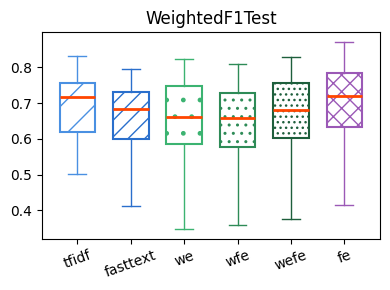

In [162]:
PLOT_TARGET = "WeightedF1Test"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


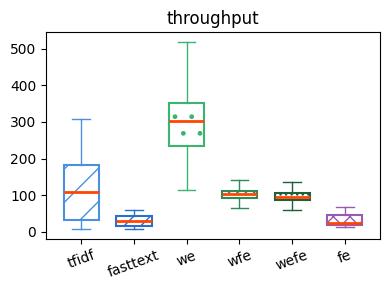

In [164]:
PLOT_TARGET = "throughput"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


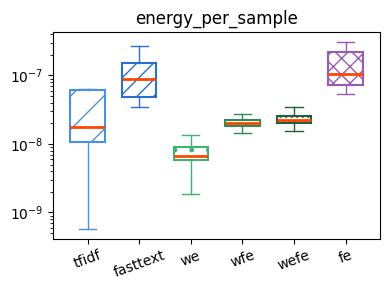

In [165]:
PLOT_TARGET = "energy_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


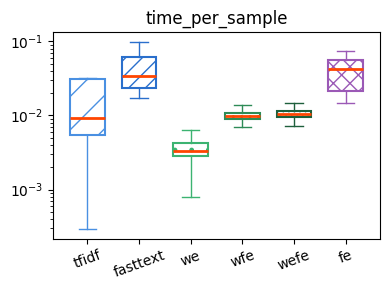

In [166]:
PLOT_TARGET = "time_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


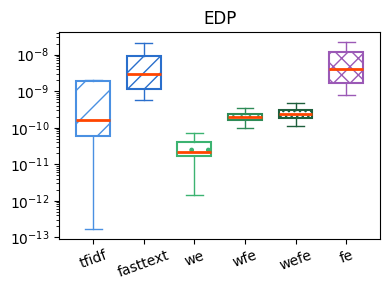

In [167]:
PLOT_TARGET = "EDP"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


##### WFE ABLATION -- FOR SELECTING mmm over mean

In [168]:
tmp_data = ternary_data[ternary_data.FeatureType == 'wfe']

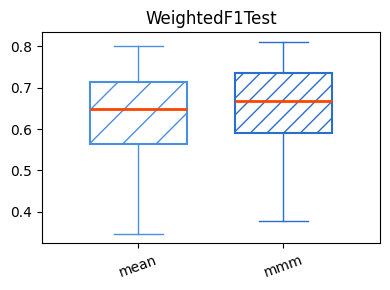

In [169]:
agg_type = ["mean", "mmm"]
PLOT_TARGET = "WeightedF1Test"

PLOT_DATA = defaultdict(list)
for agg in agg_type:
    PLOT_DATA[agg].append(tmp_data[tmp_data["FeatureVariant"]==agg][PLOT_TARGET])
    
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
# ax.set_yscale('log')

plt.tight_layout()
plt.show()


## LAPTOP

### BINARY CLASSIFICATION

In [177]:
clst_data = pd.read_csv("./generated/laptop/sentiment/single/all_lang.csv")

In [178]:
clst_data['FeatureType'] = clst_data['FeatureFamily'].apply(get_feature_type)

In [179]:
clst_data['EDP'] = clst_data['time_per_sample'] * clst_data['energy_per_sample']

In [180]:
clst_data['FeatureType'].value_counts()

FeatureType
we          2400
wefe        2400
wfe          960
fe           960
tfidf        400
fasttext     400
Name: count, dtype: int64

In [181]:
clst_data.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,2,LightGBM,0.970418,0.969958,0.797775,0.784675,76.615895,NaN,NaN,1020,27.094783,0.000256,37.645623,0.026564,2.509322e-07,tfidf,6.665641e-09
1,tfidf,300,arabic,2,LogisticRegression,0.747469,0.761098,0.735533,0.749947,39.074461,NaN,NaN,1020,27.237525,0.000267,37.448336,0.026703,2.616170e-07,tfidf,6.986079e-09
2,tfidf,300,arabic,2,RandomForest,0.788217,0.796738,0.747407,0.757930,3.278902,NaN,NaN,1020,27.919350,0.000281,36.533802,0.027372,2.754589e-07,tfidf,7.539837e-09
3,tfidf,300,arabic,2,XGBoost,0.806050,0.815729,0.738033,0.751095,1.575219,NaN,NaN,1020,27.474911,0.000277,37.124780,0.026936,2.718020e-07,tfidf,7.321311e-09
4,tfidf,300,arabic,2,GaussianNB,0.650765,0.672348,0.635421,0.657766,0.617560,NaN,NaN,1020,27.885942,0.000282,36.577571,0.027339,2.764598e-07,tfidf,7.558178e-09


In [182]:
clst_data.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'N_class', 'Model',
       'AccuracyTrain', 'WeightedF1Train', 'AccuracyTest', 'WeightedF1Test',
       'TrainingTime', 'NumParams', 'NumEpochs', 'data_pts', 'time_sec',
       'energy_kwh', 'throughput', 'time_per_sample', 'energy_per_sample',
       'FeatureType', 'EDP'],
      dtype='object')

### ANALYSIS

In [183]:
tmp_data = clst_data[(clst_data.FeatureType == 'wefe') & (clst_data.N_class == 3)]

In [184]:
tmp_data.groupby('FeatureFamily')['WeightedF1Test'].median().sort_values()

FeatureFamily
WEFE-XGLM-T      0.646557
WEFE-mBERT-T     0.664576
WEFE-XLM-R-T     0.670682
WEFE-mE5-S       0.698093
WEFE-MPNet-S     0.706019
WEFE-BGE-M3-S    0.708238
Name: WeightedF1Test, dtype: float64

### BINARY CLASSIFICATION

In [185]:
binary_data = clst_data[clst_data.N_class == 2]
binary_data = binary_data.reset_index(drop=True)
binary_data.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,2,LightGBM,0.970418,0.969958,0.797775,0.784675,76.615895,NaN,NaN,1020,27.094783,0.000256,37.645623,0.026564,2.509322e-07,tfidf,6.665641e-09
1,tfidf,300,arabic,2,LogisticRegression,0.747469,0.761098,0.735533,0.749947,39.074461,NaN,NaN,1020,27.237525,0.000267,37.448336,0.026703,2.616170e-07,tfidf,6.986079e-09
2,tfidf,300,arabic,2,RandomForest,0.788217,0.796738,0.747407,0.757930,3.278902,NaN,NaN,1020,27.919350,0.000281,36.533802,0.027372,2.754589e-07,tfidf,7.539837e-09
3,tfidf,300,arabic,2,XGBoost,0.806050,0.815729,0.738033,0.751095,1.575219,NaN,NaN,1020,27.474911,0.000277,37.124780,0.026936,2.718020e-07,tfidf,7.321311e-09
4,tfidf,300,arabic,2,GaussianNB,0.650765,0.672348,0.635421,0.657766,0.617560,NaN,NaN,1020,27.885942,0.000282,36.577571,0.027339,2.764598e-07,tfidf,7.558178e-09


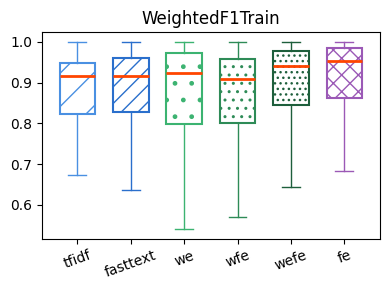

In [186]:
PLOT_TARGET = "WeightedF1Train"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


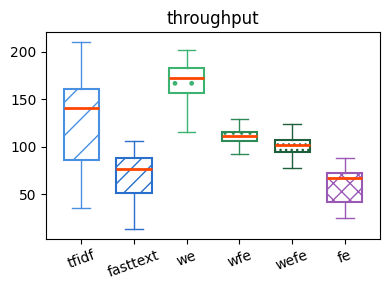

In [187]:
PLOT_TARGET = "throughput"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


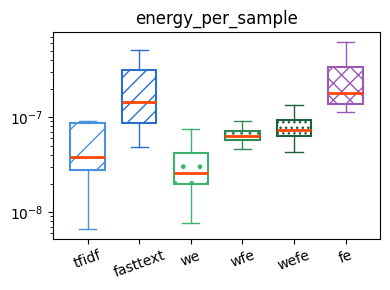

In [188]:
PLOT_TARGET = "energy_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


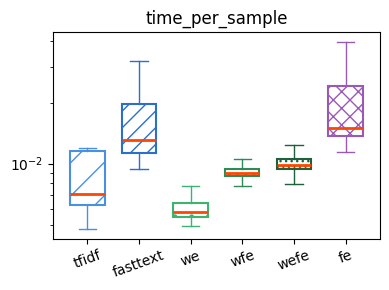

In [189]:
PLOT_TARGET = "time_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


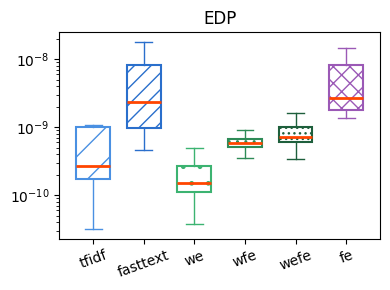

In [190]:
PLOT_TARGET = "EDP"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(binary_data[binary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


##### WFE ABLATION -- FOR SELECTING mmm over mean

In [191]:
tmp_data = binary_data[binary_data.FeatureType == 'wfe']

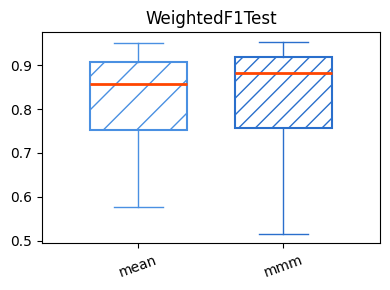

In [192]:
agg_type = ["mean", "mmm"]
PLOT_TARGET = "WeightedF1Test"

PLOT_DATA = defaultdict(list)
for agg in agg_type:
    PLOT_DATA[agg].append(tmp_data[tmp_data["FeatureVariant"]==agg][PLOT_TARGET])
    
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
# ax.set_yscale('log')

plt.tight_layout()
plt.show()


### Ternary CLASSIFICATION

In [195]:
ternary_data = clst_data[clst_data.N_class == 3]
ternary_data = ternary_data.reset_index(drop=True)
ternary_data.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,3,LightGBM,0.927154,0.927941,0.593883,0.595852,68.280387,NaN,NaN,1020,27.886396,0.000280,36.576975,0.027340,2.745788e-07,tfidf,7.506874e-09
1,tfidf,300,arabic,3,LogisticRegression,0.628861,0.600399,0.627183,0.598530,16.821861,NaN,NaN,1020,27.875457,0.000279,36.591329,0.027329,2.737627e-07,tfidf,7.481628e-09
2,tfidf,300,arabic,3,RandomForest,0.700109,0.701272,0.571261,0.574475,1.697136,NaN,NaN,1020,28.347852,0.000289,35.981562,0.027792,2.830837e-07,tfidf,7.867465e-09
3,tfidf,300,arabic,3,XGBoost,0.584429,0.588950,0.548819,0.554988,1.343745,NaN,NaN,1020,28.018906,0.000282,36.403991,0.027470,2.765865e-07,tfidf,7.597696e-09
4,tfidf,300,arabic,3,GaussianNB,0.535081,0.546898,0.532169,0.544603,0.360844,NaN,NaN,1020,27.994818,0.000278,36.435315,0.027446,2.725713e-07,tfidf,7.480966e-09


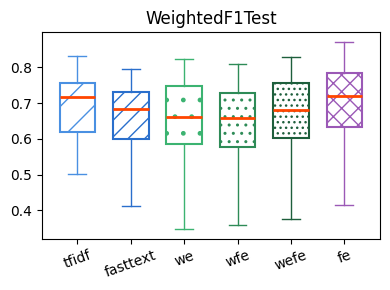

In [196]:
PLOT_TARGET = "WeightedF1Test"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


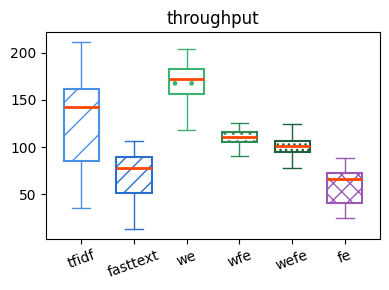

In [197]:
PLOT_TARGET = "throughput"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


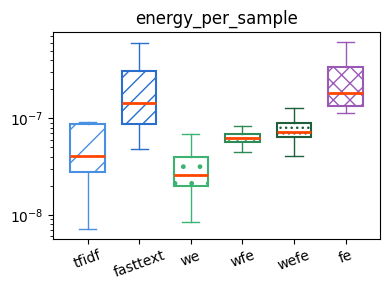

In [198]:
PLOT_TARGET = "energy_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


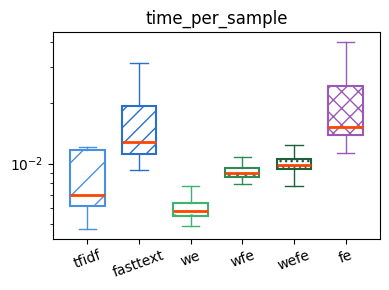

In [199]:
PLOT_TARGET = "time_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


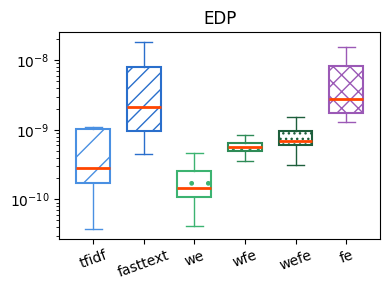

In [200]:
PLOT_TARGET = "EDP"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(ternary_data[ternary_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


##### WFE ABLATION -- FOR SELECTING mmm over mean

In [201]:
tmp_data = ternary_data[ternary_data.FeatureType == 'wfe']

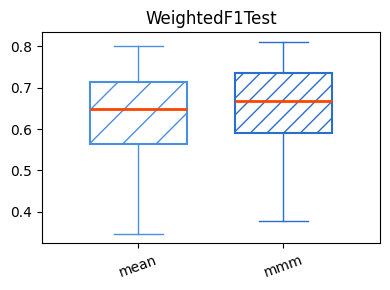

In [202]:
agg_type = ["mean", "mmm"]
PLOT_TARGET = "WeightedF1Test"

PLOT_DATA = defaultdict(list)
for agg in agg_type:
    PLOT_DATA[agg].append(tmp_data[tmp_data["FeatureVariant"]==agg][PLOT_TARGET])
    
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
# ax.set_yscale('log')

plt.tight_layout()
plt.show()
